In [1]:
%matplotlib inline
from decimal import Decimal
import itertools
from pprint import pprint

import common

from matplotlib import pyplot as plt
import matplotlib

In [2]:
def compare_for(year, length=40):
    common.compare_prime_vs_rebalancing(common.Returns_US_1871().iter_from(year), title='Annual income for %d retiree' % year, years=length)

def stocks_time(year, length=40):
    x = common.simulate_withdrawals(common.Returns_US_1871().iter_from(year), years=length)
    stock_pct = [n.portfolio_stocks / n.portfolio_n * 100 for n in x]
    common.plot(stock_pct, y_label='Stock %', x_label='Year of retirement', y_lim=(-10, 110), title='%d retiree: stock percentage' % year)

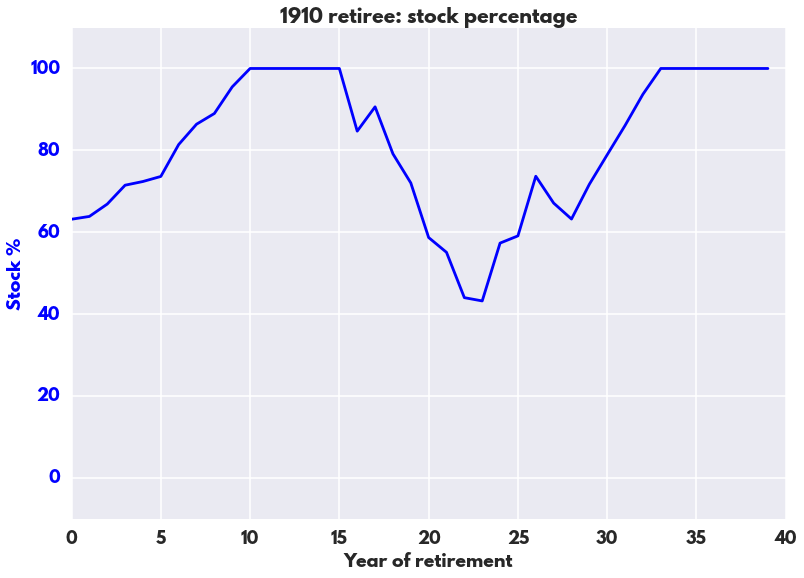

In [3]:
stocks_time(1910, length=40)

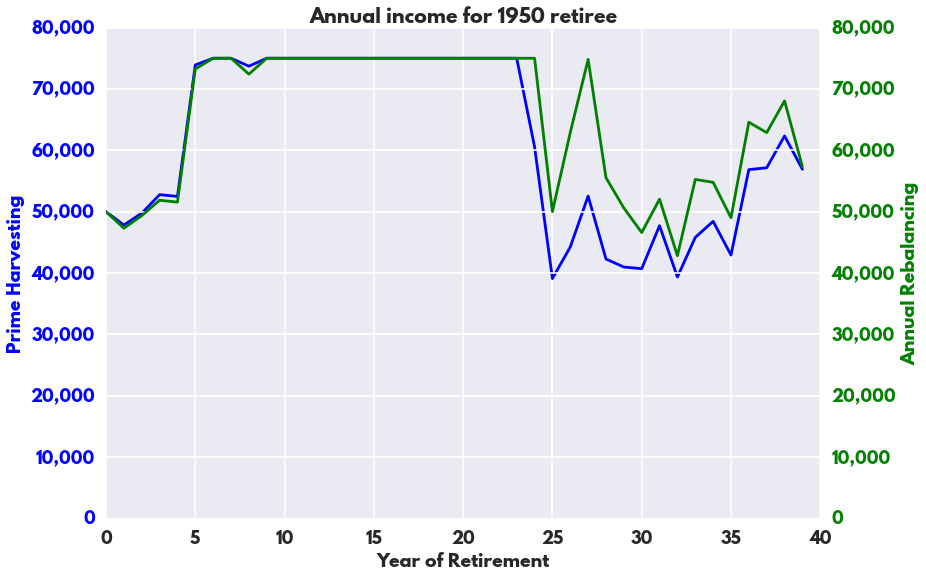

In [4]:
compare_for(1950)

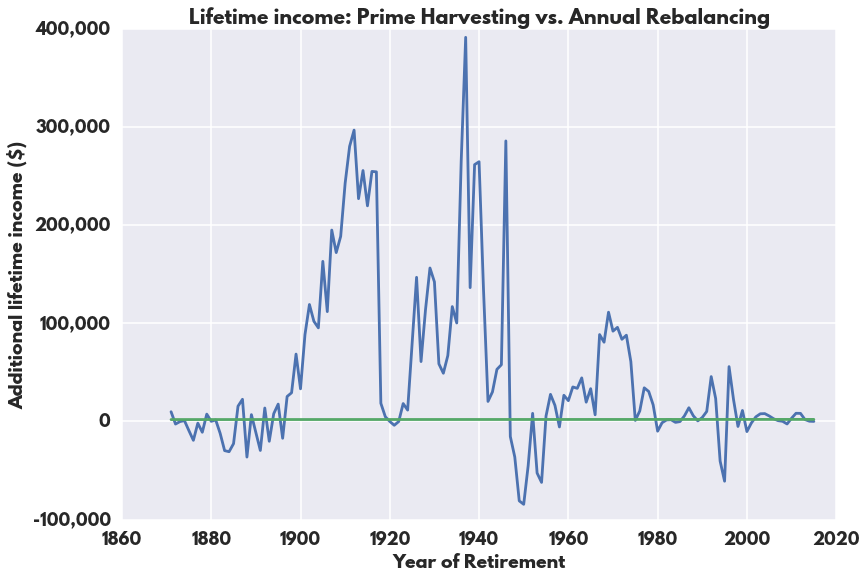

In [5]:
data_series = common.Returns_US_1871()

diff = []

for i in range(data_series.years_of_data):
    year = i + 1871
    YEARS = 30
    p = (600000,400000)

    (s1, s2) = itertools.tee(data_series.iter_from(year))
    x = common.simulate_withdrawals(s1, years=YEARS, portfolio=p)
    y = common.simulate_withdrawals(s2, years=YEARS, harvesting=common.N_60_RebalanceHarvesting, portfolio=p)
    
    prime_income = sum([n.withdraw_r for n in x])
    rebalance_income = sum([n.withdraw_r for n in y])
    
    diff.append((prime_income - rebalance_income, year))

plt.subplot(111).yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#pprint(sorted(diff))
plt.ylabel('Additional lifetime income ($)')
plt.xlabel('Year of Retirement')
plt.title('Lifetime income: Prime Harvesting vs. Annual Rebalancing')
plt.plot(range(1871, 1871 + len(diff)), diff)

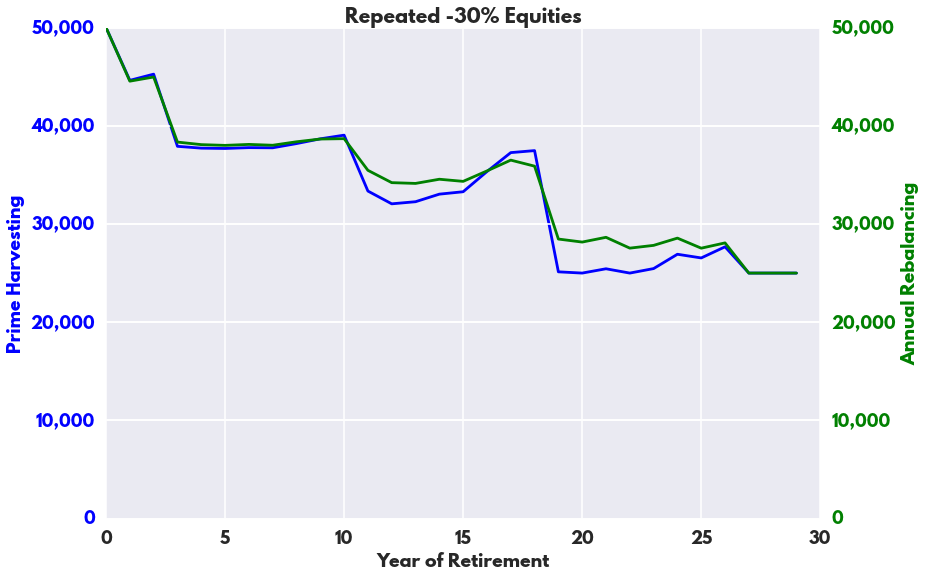

In [6]:
def r():
    yield common.AnnualChange(year=1, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=2, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=3, stocks=Decimal('-.3'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=4, stocks=Decimal('0'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(3):
        yield common.AnnualChange(year=5, stocks=Decimal('.06'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(1):
        yield common.AnnualChange(year=6, stocks=Decimal('.10'), bonds=Decimal('.02'), inflation=Decimal('0'))

common.compare_prime_vs_rebalancing(itertools.cycle(r()), title='Repeated -30% Equities')

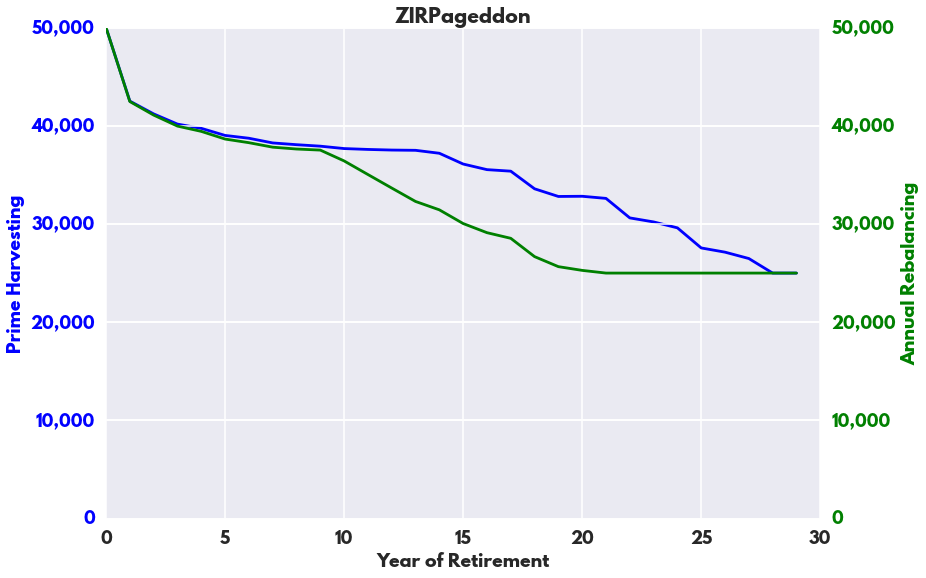

In [7]:
common.compare_prime_vs_rebalancing(common.zirp_returns(), title='ZIRPageddon')